In [1]:
%load_ext ipython_unittest
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append('..')
sys.stderr = open('/dev/null', 'w')
# os.getcwd(); os.listdir("..")

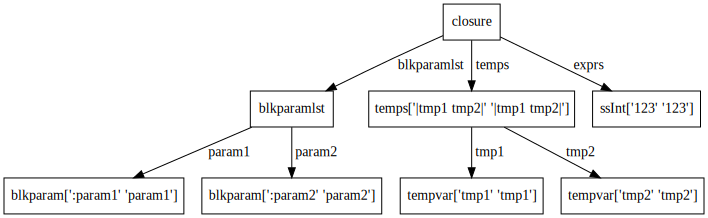

In [2]:
# ss = """abc := -123 + 1.2 + 1.0e-1 + 16r123"""

#
# Tested
#

# assignment & ExpressionList
# ss = "var1 := 1"
# ss = "var1 := root"
# ss = "var1 := 'abc'"
# ss = "var1 := root; var2 := var1"
# ss = "a := b := 2"
# ss = "var1 := root; var2 := _"

# unarySend & unaryTail
# ss = "obj1 attr3 name" 

# keywordSend
# ss = "obj1 name: 'abc'"
# ss = "obj1 method1__firstname: 'John' lastname: 'Doe'"
# ss = "obj1 attr1: 123; obj1 attr1"

# binarySend
# ss = "obj1 attr1: 1 + 2"
# ss = "obj1 attr1: 1 + 2 + obj1 var1"
# ss = "obj1 var1 + 1 + 2"
# ss = "obj1 var1 + obj1 var2"
# ss = "obj1 method3__var1: 3 + 4 var2: 2 + 3"

# cascade
# ss = "7 | + 3"
# ss = "2 | + 1; + 5" # Antlr ok, Amber fail
# ss = "obj1 var1 | +3"
# ss = "obj1 | method4 attr7 + 3" # Amber fail as it is mixed unaryMessage and binaryMessage
# ss = "obj1 | var1 + obj1 method4 attr7" # Amber fail as it is mixed unaryMessage and binaryMessage
# ss = "obj1 var2: 7 | var2  + 3" # ok
ss = "obj1 | method4 | method3__var1; 3 var2: 2 | + obj1 var1 | + 5" # ok

# subexpression
# ss = "(obj1 method4 method3__var1: 3 var2: 2) + obj1 var1 + 5"
# ss = "(obj := obj1) var1"
# ss = """(obj1 m1: 1) + (obj2 m2 m3) + 2"""

# primitive
# ss = f"<python: 'def hello:'>"

# BlockClosure
# ss = "[ :e | | a | a:= e + 1]" # error
# ss = "| tmp1 tmp2 | tmp1 := obj1 var1; tmp2 := tmp1 + 3; obj1 var2: tmp2 + 5; obj1 var2"
# ss = "| tmp1 tmp2 | obj1 var1"
# ss = "[2 + 3] value"
# ss = "[ :e | 2 + e] value: 9"
# ss = "b := [ :e | | a | a := e + 3]; b value: 9"
# ss = 'b := [ :e | | a | a "comment" := [2 + 3] value + e]; b value: 9'

# literalArray
# ss = 'obj1 := $F'
# ss = "#('a' 12 $F true #root #(1 2) + root value: )"

# ss = "123"
# ss = "b := [ :e | 2 + e]; b value: 9"
# ss = 'b := [ :e | | a | a "comment" := [2 + 3] value + e]; b value: 9'
# ss = "| tmp1 tmp2 | obj1 var1"
# ss = "[2 + 3] value"
# ss = "#('a' 12 true #root #(1 2) + root value: )"
# ss = "obj1 var1 | + 3"
# ss = "123 toString"
# ss = "var1 := root"
# ss = "obj1 | method4 attr7 + 5"
# ss = "obj1 var1 | + 3"
# ss = "7; + 3 | +5"
# ss = "7 | + 3"
# ss = "[2 + 3] value"
# ss = "[:e | 2 + e] value: 13"
# ss = "2 + 3; 4 + 5"
# ss = "_ := b := 123"
# ss = "[:e | 2 + 3 + e]"

from smallscript.SObject import *
from tests.TestBase import DebugMethod

# ss = "123"
ss = "b := [ :e | 2 + e]; b value: 9"
# ss = "obj1 | method4 | method3__var1; 3 var2: 2 | + obj1 var1 | + 5"

# ss = "obj1 | method4 | method3__var1"
# ss = "tobj | method14: 7 add: 3 | attr11 name | + tobj sobj11 attr11 + 2 + 4"
# ss = "[:param1 | param1]"
ss = ":param1 :param2| |a b| 123; a := 321; b := a"
ss = ":param1 :param2| |tmp1 tmp2| tmp1 := param2"
ss = ":param1 :param2| |tmp1 tmp2| 123"


rootContext.getOrNewPackage('nbs').importSingleSObject(DebugMethod)
method = DebugMethod()
# method.toDebug(true_).loglevel(0)
method.interpret(ss)
# method.astGraph()
method.irGraph()

In [4]:
rootContext.reset().loadPackage('smallscript')

smallscript:Package 91F0

In [5]:
rootContext.ss_packages['smallscript'].metaclasses()

{'Metaclass': Metaclass:Metaclass FDC0,
 'Execution': Execution:Metaclass 5B50,
 'IRGrapher': IRGrapher:Metaclass 5580,
 'Method': Method:Metaclass 5730,
 'PythonCoder': PythonCoder:Metaclass 5AF0,
 'Script': Script:Metaclass 54C0,
 'ScriptErrorListener': ScriptErrorListener:Metaclass 57F0,
 'TextBuffer': TextBuffer:Metaclass 5A60,
 'Context': Context:Metaclass 5910,
 'False_': False_:Metaclass 5E80,
 'Float': Float:Metaclass 55E0,
 'Holder': Holder:Metaclass 5640,
 'Integer': Integer:Metaclass 5610,
 'List': List:Metaclass 57C0,
 'Map': Map:Metaclass F910,
 'Nil': Nil:Metaclass 82B0,
 'Number': Number:Metaclass FC70,
 'Package': Package:Metaclass F160,
 'Primitive': Primitive:Metaclass FE80,
 'SObject': SObject:Metaclass F5B0,
 'Scope': Scope:Metaclass FC10,
 'String': String:Metaclass 6BB0,
 'True_': True_:Metaclass 6730,
 'ArrayStep': ArrayStep:Metaclass 6FA0,
 'AssignStep': AssignStep:Metaclass 6040,
 'BinHeadStep': BinHeadStep:Metaclass 69D0,
 'ChainStep': ChainStep:Metaclass 6790

In [12]:
rootContext.packages()

{'smallscript': smallscript:Package 7460}